In [38]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tree import Tree
from nltk.stem import PorterStemmer

from LinkedIn_Operation_identification import findSynonyms

In [95]:
synJob = findSynonyms('jobs')
JobSyn = ['job']
for syn in synJob:
    if syn not in JobSyn:
        JobSyn.append(syn)

print(JobSyn)

synOpen = findSynonyms('openings')
OpenSyn = ['opening']
for syn in synOpen:
    if syn not in OpenSyn:
        OpenSyn.append(syn)

print(OpenSyn)

synPos = findSynonyms('position')
PosSyn = ['position']
for syn in synPos:
    if syn not in PosSyn:
        PosSyn.append(syn)

print(PosSyn)

['job', 'Jobs', 'Most men', 'interview', 'work', 'jobsian', 'jobs', 'Many women', 'Surgeons', 'wissenschafterin', 'wissenschafter', 'Some jobs', "Workaholics' lives", 'casting agent', 'совместительство', '乔布斯', '喬布斯']
['opening', 'openings', 'Doors', 'ora', 'pore', 'crowd', 'space']
['position', 'وَقْفَة', 'rank', 'academicianship', 'accountantship', 'admiralty', 'ambassadorship', 'angular position', 'anomaly', 'anteriority', 'apostleship', 'apprenticeship', 'asana', 'associateship', 'attorneyship', 'back', 'bailiffship', 'ballet position', 'baronetage', "bird's eye view"]


In [12]:
import os
os.environ["CORENLP_HOME"] = '/home/shreya\stanford-corenlp-full-2018-02-27'

from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000/')

In [108]:
def stemming(text):
    ps = PorterStemmer()

    w = word_tokenize(text)
    tempword = ""
    for index, every in enumerate(w):
        tempword = tempword + (ps.stem(every))
        if (index != len(w) - 1):
            tempword = tempword + " "

    return tempword

In [97]:
text = ('search for senior software developer job openings at LinkedIn')
# text = stemming(text)

output = nlp.annotate( text, properties = { 
    'annotators' : 'tokenize, ssplit, pos, depparse, parse',
    'outputFormat': 'json'})

In [98]:
depTreeStr = output['sentences'][0]['parse']
print(depTreeStr)

(ROOT
  (NP
    (NP (NN search))
    (PP (IN for)
      (NP
        (NP (JJ senior) (NN software) (NN developer) (NN job) (NNS openings))
        (PP (IN at)
          (NP (NNP LinkedIn)))))))


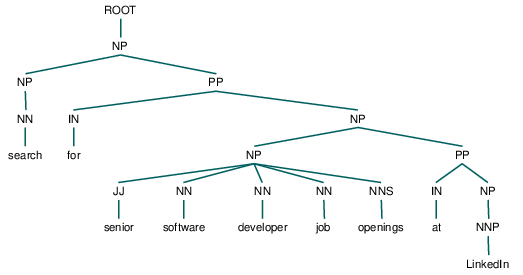

In [99]:
from nltk.tree import ParentedTree
ptree = ParentedTree.fromstring(depTreeStr)
ptree

In [100]:
leaf_values = ptree.leaves()

tree_location = []
flag = 0
for word in OpenSyn:
    if word in leaf_values:
        leaf_index = leaf_values.index(word)
        tree_location = ptree.leaf_treeposition(leaf_index)
        print (tree_location)
        print (ptree[tree_location])
        flag = 1
        break
if(flag == 0):
    for word in PosSyn:
        if word in leaf_values:
            leaf_index = leaf_values.index(word)
            tree_location = ptree.leaf_treeposition(leaf_index)
            print (tree_location)
            print (ptree[tree_location])
            flag = 2
            break
if(flag == 0):
    for word in JobSyn:
        if word in leaf_values:
            leaf_index = leaf_values.index(word)
            tree_location = ptree.leaf_treeposition(leaf_index)
            print (tree_location)
            print (ptree[tree_location])
            flag = 3
            break

(0, 1, 1, 0, 4, 0)
openings


(0, 1, 1, 0)
['senior', 'software', 'developer', 'job', 'openings']
senior software developer job openings


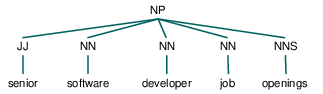

In [106]:
treeLoc = tree_location[:-2]
print(treeLoc)

if(treeLoc != []):
    subtree = ptree[treeLoc]

    childNodes = subtree.leaves()
    print(childNodes)

    position = (" ".join(childNodes))
    print(position)
    

subtree

In [107]:
position

'senior software developer job openings'